In [1]:
!pip install --upgrade pip

In [2]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import scipy
import numpy as np
import pandas as pd
import random
import sklearn
from sklearn import utils
import functools
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community import naive_greedy_modularity_communities
import networkx.algorithms.community as nx_comm
V=nx.barabasi_albert_graph(4038, 22, seed=None, initial_graph=None)

In [3]:
def plot_graph(G,name):    
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Connected components of "+name)
    ax0.set_axis_off()

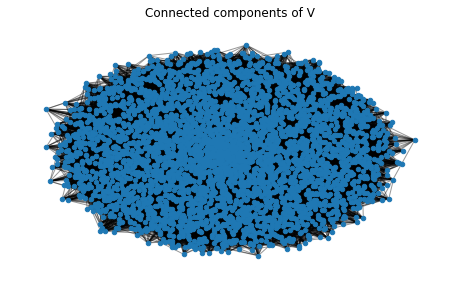

In [4]:
plot_graph(V,"V")

In [5]:
def plot_communities(communities,colors,G,name):
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of a random graph", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)
    ax0 = fig.add_subplot(axgrid[0:3, :])
    Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
    pos = nx.spring_layout(Gcc, seed=10396953)
    for i in range(len(communities)):
        nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20,nodelist=communities[i],node_color=colors[i])
    nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
    ax0.set_title("Communities"+name)
    ax0.set_axis_off()
    

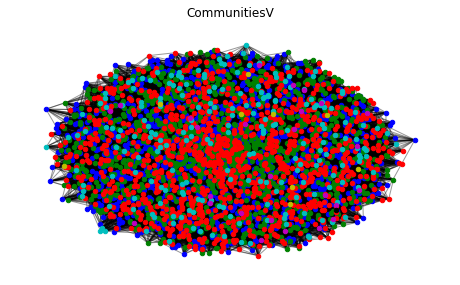

In [8]:
communities=greedy_modularity_communities(V,n_communities=7,best_n=7)
colors=["b","g","r","c","m","y","k","w"]
plot_communities(communities,colors,V,"V")

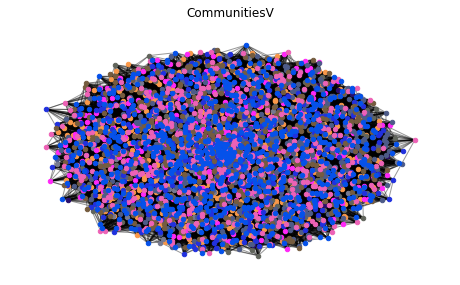

In [9]:
set_communities=nx_comm.louvain_communities(V)
communities=[]
for set_community in set_communities:
    communities.append(list(set_community))
colors=set()
while len(colors)<len(communities):
    colors.add('#%06X' % random.randint(0, 0xFFFFFF))
plot_communities(communities,list(colors),V,"V")

In [10]:
length=len(communities)
%store length

Stored 'length' (int)


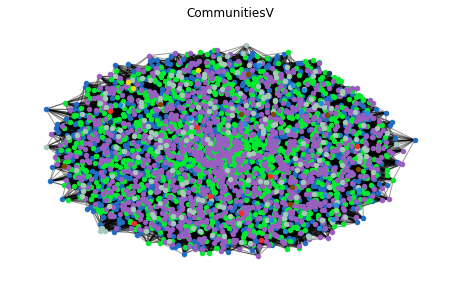

In [11]:
%store -r length
communities=greedy_modularity_communities(V,best_n=length,n_communities=length)
colors=set()
while len(colors)<len(communities):
    colors.add('#%06X' % random.randint(0, 0xFFFFFF))
plot_communities(communities,list(colors),V,"V")